# Data analysis

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

# permet d'afficher les graphiques dans un notebook
%matplotlib inline

In [2]:
# le dropna() permet de supprimer les lignes pour lesquels il manque des informations
WGI_complet = pandas.read_excel("C:/Users/Lenovo/Desktop/DMPI/Follow.xlsx").dropna()
WGI_complet

,user_id,username,full_name,bio,follower_count,following_count,private,gender
0,1,achref___ferchichi,achref___ferchichi,Madrid,1892,1358,True,male
1,2,achref_dhaouadi,achref_dhaouadi,Sacred Heart Pioneer Football • New England Bl...,1734,1248,True,male
2,3,hazem__belhaj,hazem__belhaj,"Professional lacrosse player, nike/n7 athlete ...",1908,135,True,male
3,4,biiiiibaaa_bicha,biiiiibaaa_bicha,Calandra Cavan Caliana Clayne #MyWorld Onondag...,5267,4238,True,female
4,5,manelnelly1408,manelnelly1408,Akenhnhi:io Teionakerahserá:ke,6744,5595,True,female
...,...,...,...,...,...,...,...,...
329,330,zouuhouur_ellefi,zouuhouur_ellefi,Skiing is my passion\nLoving is my life\nNatur...,4567,2290,False,female
330,331,moetez_mezni_,moetez_mezni_,"pro snowboarder, olympic medalist, 4x xgames m...",775,55,False,male
331,332,ghada113ellefi,ghada113ellefi,Professional Surfer on the WSL. #7 ????,3400,2030,True,female
333,334,yosramaalaoui,yosramaalaoui,Instagram Oficial do Lutador de MMA e Palestra...,5900,3665,False,female


In [3]:
WGI_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 0 to 334
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          295 non-null    int64 
 1   username         295 non-null    object
 2   full_name        295 non-null    object
 3   bio              295 non-null    object
 4   follower_count   295 non-null    int64 
 5   following_count  295 non-null    int64 
 6   private          295 non-null    bool  
 7   gender           295 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 18.7+ KB


In [4]:
WGI_complet.describe()

,user_id,follower_count,following_count
count,295.000000,295.000000,295.000000
mean,168.691525,2878.949153,1871.613559
std,97.236176,2412.543631,1685.408249
min,1.000000,37.000000,6.000000
25%,81.500000,952.000000,397.000000
50%,172.000000,1790.000000,985.000000
75%,253.000000,4571.000000,3358.500000
max,335.000000,9678.000000,7691.000000


In [5]:
WGI = WGI_complet.drop(columns = ["bio", "full_name","username"])

WGI["gender"].replace(
    [
        "male"
    ],
    1,
    inplace=True,
)
WGI["gender"].replace(
    [
        "female"
    ],
    2,
    inplace=True,
)
ds = {True: 1, False: 0}
WGI["private"] = WGI["private"].map(ds)

WGI

,user_id,follower_count,following_count,private,gender
0,1,1892,1358,1,1
1,2,1734,1248,1,1
2,3,1908,135,1,1
3,4,5267,4238,1,2
4,5,6744,5595,1,2
...,...,...,...,...,...
329,330,4567,2290,0,2
330,331,775,55,0,1
331,332,3400,2030,1,2
333,334,5900,3665,0,2


array([[<AxesSubplot:xlabel='user_id', ylabel='user_id'>,
        <AxesSubplot:xlabel='follower_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='following_count', ylabel='user_id'>,
        <AxesSubplot:xlabel='private', ylabel='user_id'>,
        <AxesSubplot:xlabel='gender', ylabel='user_id'>],
       [<AxesSubplot:xlabel='user_id', ylabel='follower_count'>,
        <AxesSubplot:xlabel='follower_count', ylabel='follower_count'>,
        <AxesSubplot:xlabel='following_count', ylabel='follower_count'>,
        <AxesSubplot:xlabel='private', ylabel='follower_count'>,
        <AxesSubplot:xlabel='gender', ylabel='follower_count'>],
       [<AxesSubplot:xlabel='user_id', ylabel='following_count'>,
        <AxesSubplot:xlabel='follower_count', ylabel='following_count'>,
        <AxesSubplot:xlabel='following_count', ylabel='following_count'>,
        <AxesSubplot:xlabel='private', ylabel='following_count'>,
        <AxesSubplot:xlabel='gender', ylabel='following_count'>],
       [<A

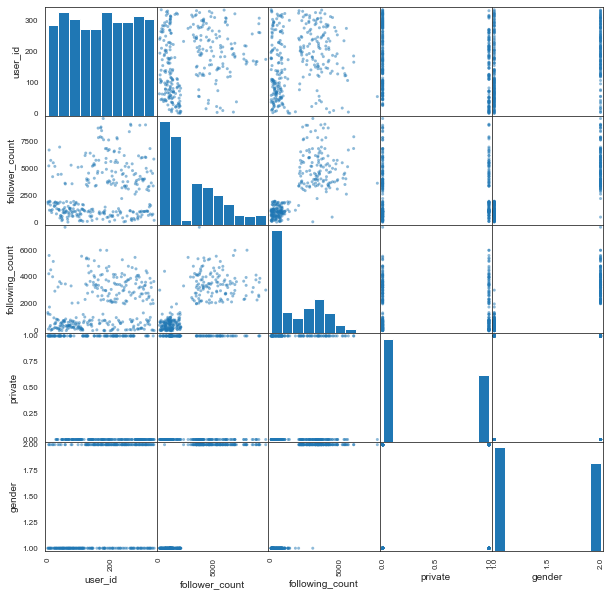

In [6]:
pandas.plotting.scatter_matrix(WGI,figsize=(10,10))


# PCA Model

In [7]:
#permet d’analyser et de visualiser un jeu de données contenant des individus décrits par plusieurs variables quantitatives.

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# suppression des colonnes non numériques
WGI_num = WGI_complet.drop(columns = ["bio", "full_name","username","private", "gender"])
pca = PCA()
pca.fit(WGI_num)
WGI_num

,user_id,follower_count,following_count
0,1,1892,1358
1,2,1734,1248
2,3,1908,135
3,4,5267,4238
4,5,6744,5595
...,...,...,...
329,330,4567,2290
330,331,775,55
331,332,3400,2030
333,334,5900,3665


In [8]:
#Représentation des individus
WGI_pca = pca.transform(WGI_num)

In [9]:
# Transformation en DataFrame pandas
WGI_pca_df = pandas.DataFrame({
    "Following" : WGI_pca[:,0], 
    "Followers" : WGI_pca[:,1],
    "private" : WGI_complet["private"],
    "gender" : WGI_complet["gender"]
})

# Résultat (premières lignes)
WGI_pca_df.head()

,Following,Followers,private,gender
0,-1110.390003,88.133951,True,male
1,-1302.672457,78.901603,True,male
2,-1746.545266,-956.416917,True,male
3,3278.849199,734.766192,True,female
4,5251.041240,1099.606699,True,female


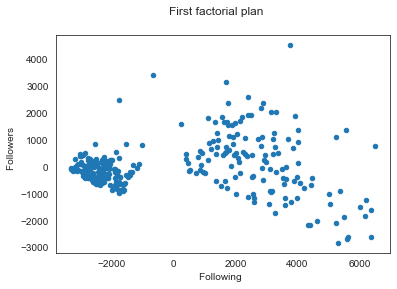

In [10]:
#représentation des données sur le premier plan factoriel
WGI_pca_df.plot.scatter("Following", "Followers") # nuage de points
plt.xlabel("Following  ") # modification du nom de l'axe X
plt.ylabel("Followers   ") # idem pour axe Y
plt.suptitle("First factorial plan ") # titre général
plt.show()

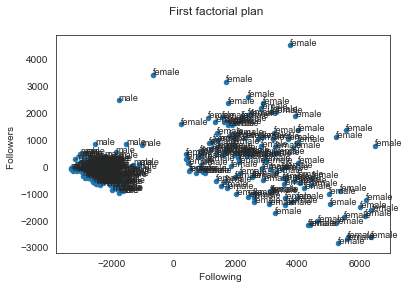

In [11]:
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Following", "Followers", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque genre
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)

        ax.annotate(k[1]["gender"], (k[1]['Following'], k[1]['Followers']), fontsize = 9)
plt.xlabel("Following  ") 
plt.ylabel("Followers  ")
plt.suptitle("First factorial plan ")
plt.show()

In [12]:
# permet de créer une palette de couleurs
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque gender 
couleurs = dict(zip(WGI_pca_df["gender"].drop_duplicates(), palette(range(2))))
couleurs

{'male': array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 'female': array([0.85098039, 0.37254902, 0.00784314, 1.        ])}

In [13]:
couleurs["male"]

array([0.10588235, 0.61960784, 0.46666667, 1.        ])

In [14]:
couleurs["female"]

array([0.85098039, 0.37254902, 0.00784314, 1.        ])

In [15]:
position = dict(zip(couleurs.keys(), range(2)))
position

{'male': 0, 'female': 1}

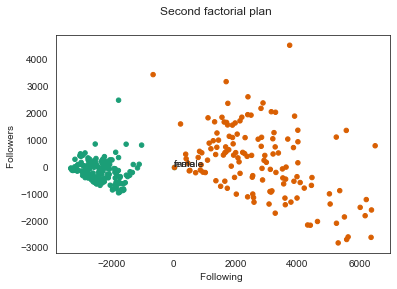

In [16]:
# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Following", y = "Followers", c = [couleurs[p] for p in WGI_pca_df["gender"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont], c = [coul], s = 20)
    plt.text(3.2, position[cont], cont)
plt.xlabel("Following ") 
plt.ylabel("Followers ")
plt.suptitle("Second factorial plan ")
plt.show()

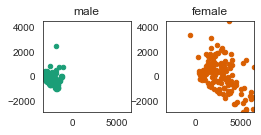

In [17]:
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for cont, coul in couleurs.items():
    
    #dimenssion (height,width)
    ax = fig.add_subplot(2, 3, position[cont]+1 )
    temp = WGI_pca_df.query('gender == "' + cont + '"')
    temp.plot.scatter(x = "Following", y = "Followers", c = [coul], ax = ax)
    ax.set_title(cont)
    ax.set_xlim(WGI_pca_df.Following.quantile([0, 1])) # permet d'avoir min et max
    ax.set_ylim(WGI_pca_df.Followers.quantile([0, 1])) # idem
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.show()

In [18]:
WGI_complet

,user_id,username,full_name,bio,follower_count,following_count,private,gender
0,1,achref___ferchichi,achref___ferchichi,Madrid,1892,1358,True,male
1,2,achref_dhaouadi,achref_dhaouadi,Sacred Heart Pioneer Football • New England Bl...,1734,1248,True,male
2,3,hazem__belhaj,hazem__belhaj,"Professional lacrosse player, nike/n7 athlete ...",1908,135,True,male
3,4,biiiiibaaa_bicha,biiiiibaaa_bicha,Calandra Cavan Caliana Clayne #MyWorld Onondag...,5267,4238,True,female
4,5,manelnelly1408,manelnelly1408,Akenhnhi:io Teionakerahserá:ke,6744,5595,True,female
...,...,...,...,...,...,...,...,...
329,330,zouuhouur_ellefi,zouuhouur_ellefi,Skiing is my passion\nLoving is my life\nNatur...,4567,2290,False,female
330,331,moetez_mezni_,moetez_mezni_,"pro snowboarder, olympic medalist, 4x xgames m...",775,55,False,male
331,332,ghada113ellefi,ghada113ellefi,Professional Surfer on the WSL. #7 ????,3400,2030,True,female
333,334,yosramaalaoui,yosramaalaoui,Instagram Oficial do Lutador de MMA e Palestra...,5900,3665,False,female


In [19]:
 data = WGI_pca_df.drop(columns = ["gender", "private"])

# dataframe vers numpay array
X = data
X = X.values

dataprivate = WGI_pca_df.drop('Followers', axis=1)
Y=dataprivate
Y=Y.values
WGI_pca_df

,Following,Followers,private,gender
0,-1110.390003,88.133951,True,male
1,-1302.672457,78.901603,True,male
2,-1746.545266,-956.416917,True,male
3,3278.849199,734.766192,True,female
4,5251.041240,1099.606699,True,female
...,...,...,...,...
329,1653.697526,-541.352470,False,female
330,-2746.116748,-419.989319,False,male
331,526.941692,-141.556699,True,female
333,3513.485224,-84.734029,False,female


In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xss = sc.fit_transform(X)
#X_test = sc.transform(X_test)

In [21]:
matrice_covariance = numpy.cov(Xss.T)

In [22]:
from numpy.linalg import eig


In [23]:
matrice_covariance.shape

(2, 2)

In [24]:
(valeurs_propres , vecteurs_propres)= eig(matrice_covariance)

In [25]:
pourcentage_information = ( valeurs_propres / valeurs_propres.sum() ) * 100

In [26]:
valeurs_propres

array([1.00340136, 1.00340136])

In [27]:
valeurs_propres.sum() 

2.0068027210884356

In [28]:
 eig(matrice_covariance)

(array([1.00340136, 1.00340136]),
 array([[-0.76220014, -0.64734145],
        [ 0.64734145, -0.76220014]]))

In [29]:
n = WGI_num.shape[0] # nb individus
p = WGI_num.shape[1] # nb variables
eigval = (n-1) /  pca.explained_variance_ # valeurs propres
sqrt_eigval = numpy.sqrt(eigval) # racine carrée des valeurs propres
corvar = numpy.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pandas.DataFrame({'id': WGI_num.columns, 'COR_1': corvar[:,2], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,user_id,-0.182143,0.000122
1,follower_count,0.000648,-0.009553
2,following_count,0.001864,0.015231


In [30]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
#fig, axes = plt.subplots(figsize = (6,6))
#fig.suptitle("Correlations Circle")
#axes.set_xlim(-1, 1)
#axes.set_ylim(-1, 1)
# Ajout des axes
#axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
#axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
#for k in range(p):
#    axes.text(coordvar["COR_1"][k],coordvar["COR_2"][k], WGI_num.columns[k])
# Ajout du cercle
#plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

#plt.show()




In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# CAH Model

In [32]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters  = 2)
hac.fit(X)


AgglomerativeClustering()

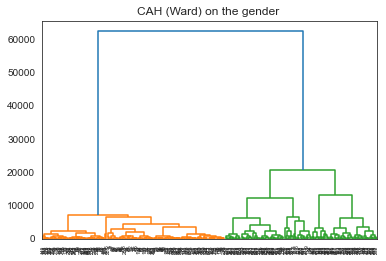

In [33]:
import scipy.cluster.hierarchy as sch


plt.title("CAH (Ward) on the gender ")
dendogram = sch.dendrogram(sch.linkage(X, method= 'ward', metric = 'euclidean'))

plt.show()

In [34]:
predHAC = hac.fit_predict(X)

predHAC


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [35]:
WGI['CAH_Cluster'] = pandas.DataFrame(predHAC, columns=['cluster'] )
print('Number of data points in each cluster= \n', WGI['CAH_Cluster'].value_counts())


Number of data points in each cluster= 
 1.0    144
0.0    115
Name: CAH_Cluster, dtype: int64


In [36]:
#WGI['CAH_Cluster'] = pandas.DataFrame(predHAC, columns=['cluster'] )
#print('Number of data points in each cluster= \n', WGI['CAH_Cluster'].value_counts())

correct_labels = 100
labels = hac.labels_
#correct_labels = sum(labels)

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(X_test.size)))

Accuracy score: 0.85


# Kmeans Model

In [37]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(X)


KMeans(n_clusters=2)

In [38]:
# Compute cluster centers and predict cluster index for each sample.
pred = kmeans2.predict(X)

pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1])

In [39]:
lab=pandas.Series(kmeans2.labels_).value_counts()
lab

1    161
0    134
dtype: int64

Text(0.5, 1.0, 'Customer Clusters')

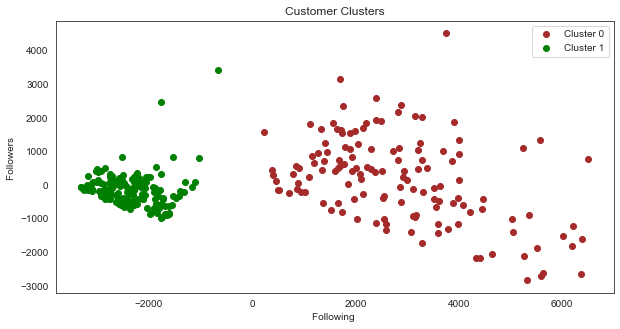

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')


#plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:, 2],s = 300, c = 'blue', label = 'Centroid', marker='*')

plt.xlabel('Following ')
plt.ylabel('Followers ')
plt.legend()
plt.title('Customer Clusters')

In [41]:
WGI_k2 = WGI_num.assign(classe = kmeans2.labels_)
WGI_k2.groupby("classe").mean()


,user_id,follower_count,following_count
classe,,,
0,204.880597,5172.253731,3506.365672
1,138.571429,970.236025,511.012422


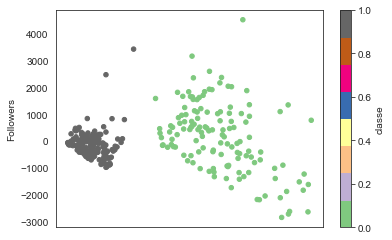

In [42]:
WGI_pca_k2 = WGI_pca_df.assign(classe = kmeans2.labels_)
WGI_pca_k2.plot.scatter(x = "Following", y = "Followers", c = "classe", cmap = "Accent")
plt.show()

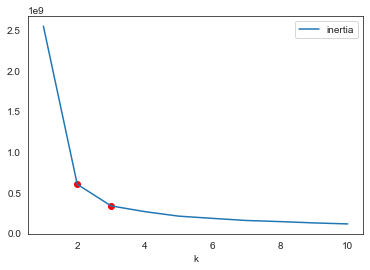

In [43]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(X)
    inertia = inertia + [kmeans.inertia_]
inertia = pandas.DataFrame({"k": range(1, 11), "inertia": inertia})
inertia.plot.line(x = "k", y = "inertia")
plt.scatter(2, inertia.query('k == 2')["inertia"], c = "red")
plt.scatter(3, inertia.query('k == 3')["inertia"], c = "red")
plt.show()

In [44]:
WGI['KMeans2_Cluster'] = pandas.DataFrame(pred, columns=['KMeans2_cluster'] )
print('Number of data points in each cluster= \n', WGI['KMeans2_Cluster'].value_counts())



Number of data points in each cluster= 
 1.0    144
0.0    115
Name: KMeans2_Cluster, dtype: int64


In [45]:
#correct_labels = 100
labels = kmeans2.labels_

# check how many of the samples were correctly labeled

correct_labels = sum(labels)

print('Accuracy score: {0:2f}'. format(correct_labels/float(X_test .size)))

Accuracy score: 0.847458


In [46]:
WGI['KMeans2_Cluster'] = pandas.DataFrame(pred, columns=['KMeans2_cluster'] )
print('Number of data points in each cluster= \n', WGI['KMeans2_Cluster'].value_counts())
print('Accuracy score: {0:2f}'. format(correct_labels/float(X_test .size)))


Number of data points in each cluster= 
 1.0    144
0.0    115
Name: KMeans2_Cluster, dtype: int64
Accuracy score: 0.847458
